In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("weather_by_cities.csv")
df.head()

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny


In [7]:
df.groupby('city').get_group("mumbai")

,day,city,temperature,windspeed,event
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain


In [9]:
for city,data in df.groupby('city'):
    print("city",city,"\n")
    print("data",data)

city mumbai 

data         day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
7  1/4/2017  mumbai           92          5   Rain
city new york 

data         day      city  temperature  windspeed  event
0  1/1/2017  new york           32          6   Rain
1  1/2/2017  new york           36          7  Sunny
2  1/3/2017  new york           28         12   Snow
3  1/4/2017  new york           33          7  Sunny
city paris 

data          day   city  temperature  windspeed   event
8   1/1/2017  paris           45         20   Sunny
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
11  1/4/2017  paris           42         10  Cloudy


In [12]:
g=df.groupby('city')

In [13]:
g.mean()

,temperature,windspeed
city,,
mumbai,88.50,9.25
new york,32.25,8.00
paris,47.75,12.75


In [15]:
g.size()

city
mumbai      4
new york    4
paris       4
dtype: int64

In [16]:
g.count()

,day,temperature,windspeed,event
city,,,,
mumbai,4,4,4,4
new york,4,4,4,4
paris,4,4,4,4


In [18]:
g.describe()

temperature                                                   \
               count   mean       std   min    25%   50%    75%   max   
city                                                                    
mumbai           4.0  88.50  3.109126  85.0  86.50  88.5  90.50  92.0   
new york         4.0  32.25  3.304038  28.0  31.00  32.5  33.75  36.0   
paris            4.0  47.75  5.315073  42.0  44.25  47.5  51.00  54.0   

         windspeed                                                 
             count   mean       std  min   25%   50%    75%   max  
city                                                               
mumbai         4.0   9.25  5.057997  5.0  5.00   8.5  12.75  15.0  
new york       4.0   8.00  2.708013  6.0  6.75   7.0   8.25  12.0  
paris          4.0  12.75  5.251984  8.0  9.50  11.5  14.75  20.0

In [19]:
df = pd.DataFrame({
    'user_id':[1,2,1,3,3,],
    'content_id':[1,1,2,2,2],
    'tag':['cool','nice','clever','clever','not-bad']
})

In [20]:
df.head()

,user_id,content_id,tag
0,1,1,cool
1,2,1,nice
2,1,2,clever
3,3,2,clever
4,3,2,not-bad


In [25]:
df.groupby("content_id")['tag'].apply(lambda tag:','.join(tag))

content_id
1                cool,nice
2    clever,clever,not-bad
Name: tag, dtype: object

In [29]:
df.groupby("content_id")['user_id'].nunique()

content_id
1    2
2    2
Name: user_id, dtype: int64

In [30]:
df.groupby("content_id")['user_id'].nunique().to_frame()

,user_id
content_id,
1,2
2,2


In [31]:
df.groupby("content_id")['user_id'].nunique().to_frame().reset_index()

,content_id,user_id
0,1,2
1,2,2


In [32]:
df = pd.DataFrame({
    'value':[20.45,22.89,32.12,111.22,33.22,100.00,99.99],
    'product':['table','chair','chair','mobile phone','table','mobile phone','table']
})

In [33]:
df.head()

,value,product
0,20.45,table
1,22.89,chair
2,32.12,chair
3,111.22,mobile phone
4,33.22,table


In [34]:
df.groupby('product')['value'].sum().to_frame().reset_index()

,product,value
0,chair,55.01
1,mobile phone,211.22
2,table,153.66


In [38]:
df.groupby('product')['value'].sum().to_frame().sort_values('value').reset_index()

,product,value
0,chair,55.01
1,table,153.66
2,mobile phone,211.22


In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

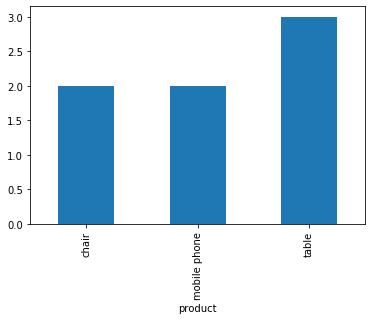

In [41]:
df.groupby('product').size().plot(kind='bar')
plt.show()

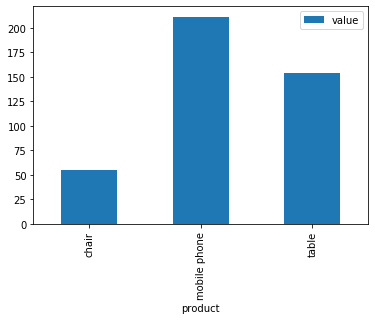

In [43]:
df.groupby('product').sum().plot(kind='bar')
plt.show()

In [46]:
grouped_df = df.groupby('product').agg({'value':['min','max','mean']})

In [47]:
grouped_df

value                 
                 min     max     mean
product                              
chair          22.89   32.12   27.505
mobile phone  100.00  111.22  105.610
table          20.45   99.99   51.220

In [48]:
grouped_df.columns.values

array([('value', 'min'), ('value', 'max'), ('value', 'mean')],
      dtype=object)

In [55]:
df = pd.DataFrame({
    'value':[20.45,22.89,32.12,111.22,33.22,100.00,99.99],
    'product':['table','chair','chair','mobile phone','table','mobile phone','table']
})

In [49]:
df = pd.DataFrame({
    'value':[20.45,22.89,32.12,111.22,33.22,100.00,99.99],
    'product':['table','chair','chair','mobile phone','table','mobile phone','table'],
    'price':[202.425,232.892,322.121,111.222,333.222,100.010,929.199]
    
})

In [50]:
grouped_df = df.groupby('product').agg({'value':['min'],'price':['mean']})

In [51]:
grouped_df

,value,price
,min,mean
product,,
chair,22.89,277.5065
mobile phone,100.00,105.6160
table,20.45,488.2820


In [52]:
def count_even(series):
    return len([e for e in series if e%2==0])

In [57]:
df.groupby('product')['value'].apply(count_even).reset_index(name='num_even_numbers')

,product,num_even_numbers
0,chair,0
1,mobile phone,1
2,table,0
